In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras

import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import string

# Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
df= pd.read_csv('Lemmi.csv')
df

,Unnamed: 0,text,documents_cleaned
0,0,in quello giorno essere impossibile passeggiare .,"['in', 'quello', 'giorno', 'essere', 'impossib..."
1,1,il mattina avere errare per uno ora nel bosche...,"['il', 'mattina', 'avere', 'errare', 'per', 'u..."
2,2,ne essere contentare .,"['ne', 'essere', 'contentare', '.']"
3,3,non mi essere mai piacere il lungo passeggiate...,"['non', 'mi', 'essere', 'mai', 'piacere', 'il'..."
4,4,"eliza , John e georgiana essere aggruppare in ...","['eliza', ',', 'John', 'e', 'georgiana', 'esse..."
...,...,...,...
19797,19797,il paura della morte non offuscare il ultimo o...,"['il', 'paura', 'della', 'morte', 'non', 'offu..."
19798,19798,"il suo stesso parola ne essere pegno : \n\n "" ...","['il', 'suo', 'stesso', 'parola', 'ne', 'esser..."
19799,19799,ogni giorno mi annunciare con sempre grande ch...,"['ogni', 'giorno', 'mi', 'annunciare', 'con', ..."
19800,19800,", e di ora in ora io rispondere con fervore cr...","[',', 'e', 'di', 'ora', 'in', 'ora', 'io', 'ri..."


In [ ]:
from spacy.lang.it.stop_words import STOP_WORDS
def clean(x):
  stop = STOP_WORDS
  words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop and w not in string.punctuation]
  return " ".join(words)

In [ ]:
df['clean'] = df['text'].apply(clean)

In [ ]:
df.dropna(subset=['clean'], inplace=True)

In [ ]:
text = df['clean']

In [ ]:
text

0                                  impossibile passeggiare
1        mattina errare boschetto spogliare foglia pran...
2                                               contentare
3        piacere passeggiate freddo penoso tornar notte...
4        eliza john e georgiana aggruppare salotto atto...
                               ...                        
19797    paura morte offuscare st john mente nube cuore...
19798                       parola pegno signore avvertire
19799                annunciare chiarezza sì venire presto
19800    e rispondere fervore crescente amen venire sig...
19801                                                     
Name: clean, Length: 19802, dtype: object

#KMEANS USING TF IDF

In [ ]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(text.values)
tfidf.shape

(19802, 14128)

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf)
    distortions.append(kmeanModel.inertia_)

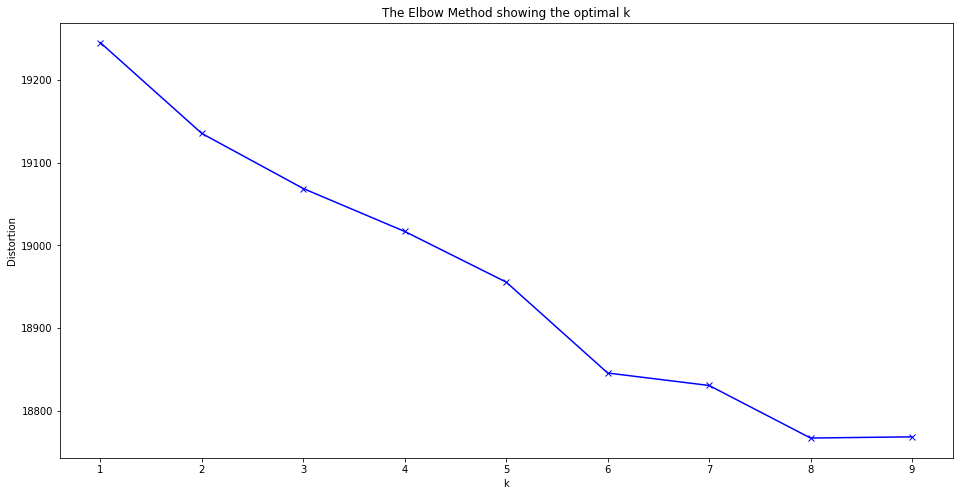

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 5, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [ ]:
cluster_center_tf

array([[4.20917411e-05, 3.76648981e-05, 3.87572222e-05, ...,
        2.31651524e-05, 2.63048957e-05, 3.64105207e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.87903175e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [ ]:
silhouette_score_tf

0.012371453259770624

In [ ]:
for i in range(5):
 print(i)
 for ind in order_centroids[i, :10]:
   print(terms1[ind])

0
stare
potere
sedere
dovere
parlare
bessie
signore
sentire
signora
reed
1
davvero
jane
volere
strano
stare
sposare
signore
bello
spiegare
signorina
2
vedere
potere
occhio
stare
venire
sentire
sapere
guardare
volere
signore
3
signore
rochester
sì
credere
potere
parlare
rivers
domandare
pensare
sapere
4
potere
dovere
sapere
pensare
né
lasciare
parlare
amare
dare
vivere


In [ ]:
# Giving Labels/assigning a cluster to each sentence
df1 = data
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Unnamed: 0,text,documents_cleaned,clean,Bow Clus Label,Tfidf Clus Label
0,0,in quello giorno essere impossibile passeggiare .,"['in', 'quello', 'giorno', 'essere', 'impossib...",impossibile passeggiare,2,0
1,1,il mattina avere errare per uno ora nel bosche...,"['il', 'mattina', 'avere', 'errare', 'per', 'u...",mattina errare boschetto spogliare foglia pran...,1,0
2,2,ne essere contentare .,"['ne', 'essere', 'contentare', '.']",contentare,2,0
3,3,non mi essere mai piacere il lungo passeggiate...,"['non', 'mi', 'essere', 'mai', 'piacere', 'il'...",piacere passeggiate freddo penoso tornar notte...,2,0
4,4,"eliza , John e georgiana essere aggruppare in ...","['eliza', ',', 'John', 'e', 'georgiana', 'esse...",eliza john e georgiana aggruppare salotto atto...,2,0


In [ ]:
# How many sentences belong to each cluster

df1.groupby(['Tfidf Clus Label'])['text'].count()

Tfidf Clus Label
0    15966
1     1792
2      796
3      781
4      467
Name: text, dtype: int64

In [ ]:
#Find the top 10 features of cluster centriod
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: stare
 dovere
 andare
 sapere
 sì
 sentire
 parlare
 mr
 venire
 oh
Cluster 1: potere
 volere
 sapere
 andare
 stare
 parlare
 né
 dovere
 amare
 pensare
Cluster 2: signore
 rochester
 sì
 volere
 andare
 potere
 stare
 credere
 parlare
 rivers
Cluster 3: vedere
 potere
 occhio
 stare
 venire
 sentire
 sapere
 volere
 andare
 guardare
Cluster 4: jane
 eyre
 volere
 sì
 venire
 signore
 signorina
 andare
 stare
 sentire


In [ ]:
# consider sample of 6 random sentences for cluster 0
# self discovery
# Jane intraprende un viaggio di scoperta personale e scopre chi è, sia in termini di identità che di personalità, e come può trovare la propria felicità

print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[0][244]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[0][780]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[0][1150]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[0][1250]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[0][1410]]['text'])

qualche volta , occupare dal lavoro , ripetere il ritornello a voce basso , e questo parola : " c' essere uno volta , tanto tanto tempo fa " mi fare il impressione di uno inno funebre .
______________________________________________________________________
 dovere desiderare di andarvene di qui " 

  no ; perché lo desiderare " essere stare mandare a lowood per istruire ; che ci guadagnare andandomene senza avere compiere il istruzione " 

  ma il signorina scatcherd essere così crudele con voi !
______________________________________________________________________
il mio pensiero essere molto armonioso , il sensazione meglio regolato ; essere fedele al dovere e all' ordine ; mi sentire calmo e mi credere felice .
______________________________________________________________________
Miss elisa essere molto grande di voi tutto il testa e miss georgiana essere due volta voi per forza .
______________________________________________________________________
 venire a salutare il vost

In [ ]:
#consider sample of 6 random sentences for cluster 1
# class struggle
# all'inizio del romanzo Jane è odiata da tutti e viene guardata con disprezzo a causa della sua classe sociale, fino a quando non riesce anche lei ad ottenere una stabilità
# economica e un ruolo sociale superiore a quello passato

print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[1][100]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[1][120]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[1][25]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[1][85]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[1][40]]['text'])

non potere essere solo ed odiata .
______________________________________________________________________
desideravo che il sonno il imponesse silenzio e mi parere che avere trovare uno soluzione al problema , se soltanto avere potere riflettere uno poco a ciò che mi preoccupare quando essere appoggiare alla finestra .
______________________________________________________________________
 nemmeno se essere buono per voi " 

 scrollai il testa ; non potere capire come avere potere essere buono quello gente se essere povero ; e poi imparare a parlare come il povero , acquistare il loro maniera , non avere educazione , crescere come quelle misero donna , che vedere allattare il bimbo e lavare il bucato sulla porta della casupola del villaggio ; no , non essere abbastanza eroico per acquistare il libertà col suo corteo di miseria .
______________________________________________________________________
 a proposito , signora , volere che il calza di lana essere in migliore stato .
______

In [ ]:
#consider sample of 6 random sentences for cluster 2
# l'amore e il matrimonio, l'amore passionale di Jane e del signor Rochester
# nella seconda parte del romanzo lui appare simbolicamente punito con la perdita di una mano e della vista, ma Jane non cambia idea sul suo amore

print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[2][115]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[2][45]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[2][30]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[2][100]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[2][125]]['text'])

in quello riunione il molto ricercato essere il uomo , e il signore rochester essere così piacevole in conversazione , che tutto lo volere bene .
______________________________________________________________________
mi dire che il signore Carter , il medico , essere col signore rochester ; poi ordinare il tè ed io salire in camera per spogliare .
______________________________________________________________________
essere vero che dal lato di suo madre essere parere lontano del signore rochester , o almeno mio marito essere parente .
______________________________________________________________________
essere sempre brutto al mio occhio , il signore rochester " il gratitudine e certe dolci e aggradevoli associazione di idea fare sì che non mi piacere nulla molto del suo volto .
______________________________________________________________________
pensare a prendere per modello il signore rochester " no , nessun disperazione , nessun sentimento : volere buon senso e risolutezza . 



In [ ]:
#consider sample of 6 random sentences for cluster 3
# elemento gotico del romanzo, questo si presenta tramite ambientazioni lugubri o tetri ("incubo spaventoso", "luce rossastro"), oppure con figure vere e proprie
# ad esempio fantasmi o spiriti

print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[3][10]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[3][55]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[3][70]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[3][90]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[3][220]]['text'])

appena tornare in me pervenire ad uscire da uno incubo spaventoso e di vedere dinanzi al occhio uno luce rossastro a striscia nero e fitto .
______________________________________________________________________
allora il mio mente fare il primo sforzo per capire ciò che avere imparare sul cielo e sull' inferno , e per il primo volta si spaventare , e guardare avanti e indietro , si vedere circondare da uno abisso senza fondo ; essa non capiva e non sentire altro che uno cosa : il presente .
______________________________________________________________________
si vedere brillare il lume dietro il tenda di uno finestra bifora ; tutto il resto essere nel buio .
______________________________________________________________________
quando vedere avvicinare il cavallo , al mio spirito , che essere sempre pieno del racconto fantastico dell' infanzia , tornare uno fola di bessie , nella quale figurare un spirito del nord dell' Inghilterra , chiamare gytrash .
_______________________________

In [ ]:
#consider sample of 6 random sentences for cluster 4
# tema della religione, in un primo momento Jane ripudia la religione e la chiesa, poichè è troppo attaccata al denaro e sfrutta la bontà dei religiosi a suo vantaggio.
# Successivamente conosce un prete buono e realmente legato a Dio, in questa seconda fase della vita di Jane, lei ritrova la fiducia nella chiesa e in Dio.

print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[4][88]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[4][58]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[4][95]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[4][325]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Tfidf Clus Label']).groups[4][142]]['text'])

 chiedetemi qualcosa ora , Jane ; il molto piccolo cosa , perché desiderare essere pregare .
______________________________________________________________________
quanto denaro possedere in tutto , Jane "  mi domandare sorridere .
______________________________________________________________________
non essere vero , Jane , che vi essere allontanare dal gregge per cercare il vostro pastore " 

  avere bisogno di voi , ma non esultare ancora .
______________________________________________________________________
ti essere allontanare dall' ovile per cercare il tuo pastore , non essere vero , Jane ? "
______________________________________________________________________
che cosa fare , Jane " dove trovare uno compagna " dove cercare il speranza " 

  fate quel che volere ; avere fiducia in dio e in voi stesso .


#K-Means with Word2Vec

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Train your own Word2Vec model
i=0
list_of_sent=[]
for sent in data['clean'].values:
    list_of_sent.append(sent.split())

In [ ]:
import gensim
# Training the wor2vec model
w2v_model = Word2Vec.load('word2vec_model_lemmi')

In [ ]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence is stored in this train
for sent in list_of_sent: # for each sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence
    for word in sent: # for each word in a sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(19802, 100)

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(sent_vectors)
    distortions.append(kmeanModel.inertia_)

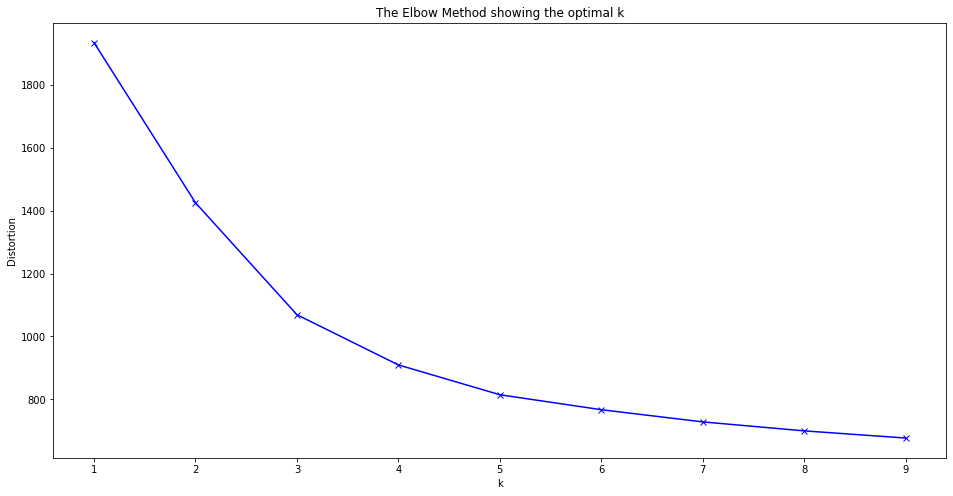

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Training
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = 3)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [ ]:
# Giving Labels/assigning a cluster to each point/text 
dfa = df1
dfa['Word2Vec Label'] = model2.labels_
dfa.head(2)

,Unnamed: 0,text,documents_cleaned,clean,Bow Clus Label,Tfidf Clus Label,Word2Vec Label
0,0,in quello giorno essere impossibile passeggiare .,"['in', 'quello', 'giorno', 'essere', 'impossib...",impossibile passeggiare,2,0,2
1,1,il mattina avere errare per uno ora nel bosche...,"['il', 'mattina', 'avere', 'errare', 'per', 'u...",mattina errare boschetto spogliare foglia pran...,1,0,2


In [ ]:
# How many points belong to each cluster
dfa.groupby(['Word2Vec Label'])['text'].count()

Word2Vec Label
0     7002
1      502
2    12298
Name: text, dtype: int64

In [ ]:
# considers sample of 6 random sentences for cluster 0
# tema della religione

print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][2203]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][2829]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][3000]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][5500]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][6240]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][4624]]['text'])

 essere malato , o avere fame " 

  avere fame , credere .
______________________________________________________________________
iddio vi benedire , signore !
______________________________________________________________________
spera che io essere felice e che il signore non volere contarmi fra quelli che vivere senza dio nel mondo , curandosi della solo cosa terrestre .
______________________________________________________________________
vostro zio essere felice di sapere ... sempre se essere ancora vivo quando mr mason tornare a madera . "
______________________________________________________________________
" semplicemente dire che vostro zio , mr eyre di madera , essere morire , che vi avere lasciare tutto il suo bene e che adesso voi essere ricco .
______________________________________________________________________
per il amore di dio , venire qui ! "


In [ ]:
#considers sample of 6 random sentences for cluster 0

print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][32]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][110]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][210]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][2500]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][2100]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][1830]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][8222]]['text'])

egli stare tre minuto a mostrare il lingua , allungare quanto molto potere , sapere che stare per picchiarmi e spiare sulla suo brutta fare il momento in cui il collera avrebbegli fare allungare il mano .
______________________________________________________________________
dopo poco mi accorrere che qualcuno si avvicinare a me , mi sollevare collocandomi in uno posizione molto comodo ; nessuno mi avere mai trattare fino a quello momento con tanto sollecitudine affettuoso .
______________________________________________________________________
che cosa fare " essere rosso come uno colpevole .
______________________________________________________________________
il uccello incominciare a cantare a coppia e a branco ; il uccello essere felice nel loro affetto , essere il emblema dell' amore .
______________________________________________________________________
non essere soltanto agitare per il preparativo , né per il grande cambiamento che stare per operare nella mio esistenza , che

In [ ]:
#considers sample of 6 random sentences for cluster 1
# ruolo della famiglia

print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][178]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][120]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][122]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][400]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][671]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][1830]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][7000]]['text'])

 benissimo , signore , allora potere essere certo che questo bambina essere accettare a lowood , che vi essere educare come richiedere il suo posizione e in vista del suo dovere futuro .
______________________________________________________________________
allora seppi per il primo volta , dal discorso che abbot fare a bessie , che mio padre essere uno povero pastore , che mio madre lo avere sposare contro il volere del suoi , che considerare quello matrimonio inferiore alla suo condizione .
______________________________________________________________________
dopo uno anno di matrimonio mio padre essere attaccare dal tifo .
______________________________________________________________________
dopo questo sublime conclusione il pastore si abbottonare il soprabito e dire qualcosa sottovoce alla famiglia .
______________________________________________________________________
 essere uno donna che tenere per cucire e per aiutare leah ,  continuare il vedova .
______________________

In [ ]:
# considers sample of 6 random sentences for cluster 2
# 

print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][150]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][1253]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][370]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][400]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][970]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][1830]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][2010]]['text'])

 come potere compiangermi dopo quello che avere dire il signore bockelhurst " 

  egli non essere dio , non essere uno uomo che riscuotere fiducia .
______________________________________________________________________
questo tuo tendenza alla sciatteria essere incorreggibile !
______________________________________________________________________
 credere ,  dire lady lynn ,  che essere pupilla del signore rochester , quella francesina di cui ci avere parlare .
______________________________________________________________________
nonostante che essere truccare , riconoscere in lui il signore rochester .
______________________________________________________________________
quello parola mi avvertire che il signore Edoardo , il mio signore rochester , essere vivo .
______________________________________________________________________
" addio , Miss eyre , per il momento .
______________________________________________________________________
" voi , signore , essere il cosa mol